### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/elections.csv')

df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,ТИК №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,ТИК №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,ТИК №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,ТИК №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,ТИК №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82


In [2]:
stationary = "Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"
transport = "Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"
total = "Всего бюллнтеней"

df[total] = df[stationary] + df[transport]

In [3]:
attendance = "Явка"
listed_voters = "Число избирателей, внесенных в список избирателей на момент окончания голосования"

df[attendance] = df[total] / df[listed_voters]

df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллнтеней,Явка
0,ТИК №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120,598,0.331669
1,ТИК №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46,444,0.302865
2,ТИК №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96,598,0.285851
3,ТИК №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71,322,0.304924
4,ТИК №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82,501,0.274220


In [4]:
df.sort_values(attendance, ascending=False, inplace=True)
df.head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллнтеней,Явка
972,ТИК №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,1.0
1458,ТИК №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,1.0
1095,ТИК №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,1.0
1377,ТИК №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,1.0
1969,ТИК №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,1.0


In [5]:
amosov_percent = "Амосов %"
beglov_percent = "Беглов %"
tikhonova_percent = "Тихонова %"

df[amosov_percent] = -1
df[beglov_percent] = -1
df[tikhonova_percent] = -1

tik_min_100_votes = df[total] >= 100

df.loc[tik_min_100_votes, amosov_percent] = np.around(df["Амосов Михаил Иванович"] / df[total], 2)
df.loc[tik_min_100_votes, beglov_percent] = np.around(df["Беглов Александр Дмитриевич"] / df[total], 2)
df.loc[tik_min_100_votes, tikhonova_percent] = np.around(df["Тихонова Надежда Геннадьевна"] / df[total], 2)
df.loc[tik_min_100_votes].head()

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,...,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллнтеней,Явка,Амосов %,Беглов %,Тихонова %
972,ТИК №15,УИК №2293,203,300,151,52,97,52,151,10,...,0,0,20,142,31,203,1.0,0.10,0.70,0.15
1458,ТИК №22,УИК №408,201,500,120,81,299,81,120,9,...,0,0,17,140,35,201,1.0,0.08,0.70,0.17
1095,ТИК №17,УИК №2284,235,500,235,0,265,0,235,11,...,0,0,17,165,42,235,1.0,0.07,0.70,0.18
1969,ТИК №29,УИК №2178,126,500,126,0,374,0,126,0,...,0,0,12,114,0,126,1.0,0.10,0.90,0.00
1453,ТИК №22,УИК №403,668,1000,68,600,332,600,68,3,...,0,0,6,652,7,668,1.0,0.01,0.98,0.01


In [6]:
df.loc[df[amosov_percent] == df[amosov_percent].max()]

,tik_name,uik_name,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,...,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллнтеней,Явка,Амосов %,Беглов %,Тихонова %
1085,ТИК №17,УИК №567,2206,2000,635,8,1357,8,635,25,...,0,0,267,284,67,643,0.291478,0.42,0.44,0.1


In [7]:
tik_groups = df.groupby("tik_name")

tik_groups_attendance_max = tik_groups[attendance].max()
tik_groups_attendance_min = tik_groups[attendance].min()

(tik_groups_attendance_max - tik_groups_attendance_min).sort_values()

tik_name
ТИК №25    0.158715
ТИК №12    0.328265
ТИК №14    0.338567
ТИК №6     0.419000
ТИК №9     0.487510
ТИК №10    0.555662
ТИК №7     0.634323
ТИК №3     0.659203
ТИК №15    0.707452
ТИК №24    0.716071
ТИК №16    0.727179
ТИК №18    0.741768
ТИК №13    0.745692
ТИК №30    0.746789
ТИК №1     0.770264
ТИК №29    0.788658
ТИК №22    0.790130
ТИК №23    0.792554
ТИК №20    0.795551
ТИК №2     0.797043
ТИК №21    0.798544
ТИК №27    0.800435
ТИК №8     0.804721
ТИК №4     0.805240
ТИК №5     0.806885
ТИК №26    0.810310
ТИК №11    0.811447
ТИК №28    0.812746
ТИК №19    0.816304
ТИК №17    0.820420
Name: Явка, dtype: float64

In [8]:
tik_groups[attendance].var()

tik_name
ТИК №1     0.019176
ТИК №10    0.007428
ТИК №11    0.024049
ТИК №12    0.003220
ТИК №13    0.039352
ТИК №14    0.003146
ТИК №15    0.041623
ТИК №16    0.011306
ТИК №17    0.033070
ТИК №18    0.024045
ТИК №19    0.020498
ТИК №2     0.046172
ТИК №20    0.017360
ТИК №21    0.031005
ТИК №22    0.045146
ТИК №23    0.059075
ТИК №24    0.027265
ТИК №25    0.000844
ТИК №26    0.022018
ТИК №27    0.020655
ТИК №28    0.039163
ТИК №29    0.024188
ТИК №3     0.007303
ТИК №30    0.052221
ТИК №4     0.022297
ТИК №5     0.013666
ТИК №6     0.002043
ТИК №7     0.006799
ТИК №8     0.026004
ТИК №9     0.011464
Name: Явка, dtype: float64

In [9]:
counts_amosov = df.groupby(amosov_percent).count()["uik_name"]
counts_beglov = df.groupby(beglov_percent).count()["uik_name"]
counts_tikhonova = df.groupby(tikhonova_percent).count()["uik_name"]


print("Амосов проценты")
for percent, count in zip(counts_amosov.index, counts_amosov):
    print(f"{percent}: {count}")

print("Беглов проценты")
for percent, count in zip(counts_beglov.index, counts_beglov):
    print(f"{percent}: {count}")
    
print("Тихонова проценты")
for percent, count in zip(counts_tikhonova.index, counts_tikhonova):
    print(f"{percent}: {count}")

Амосов проценты
-1.0: 15
0.01: 6
0.02: 6
0.03: 2
0.04: 13
0.05: 17
0.06: 23
0.07: 35
0.08: 47
0.09: 68
0.1: 89
0.11: 98
0.12: 116
0.13: 130
0.14: 129
0.15: 160
0.16: 153
0.17: 151
0.18: 126
0.19: 100
0.2: 89
0.21: 82
0.22: 76
0.23: 44
0.24: 56
0.25: 40
0.26: 44
0.27: 26
0.28: 26
0.29: 17
0.3: 15
0.31: 5
0.32: 6
0.33: 4
0.34: 1
0.35: 3
0.36: 2
0.42: 1
Беглов проценты
-1.0: 15
0.3: 1
0.32: 1
0.33: 2
0.38: 3
0.39: 3
0.4: 3
0.41: 5
0.42: 3
0.43: 3
0.44: 8
0.45: 8
0.46: 10
0.47: 20
0.48: 14
0.49: 24
0.5: 27
0.51: 37
0.52: 37
0.53: 44
0.54: 36
0.55: 52
0.56: 62
0.57: 68
0.58: 77
0.59: 79
0.6: 122
0.61: 93
0.62: 92
0.63: 96
0.64: 89
0.65: 79
0.66: 82
0.67: 73
0.68: 77
0.69: 61
0.7: 72
0.71: 48
0.72: 53
0.73: 40
0.74: 37
0.75: 37
0.76: 28
0.77: 21
0.78: 19
0.79: 20
0.8: 20
0.81: 24
0.82: 13
0.83: 14
0.84: 14
0.85: 9
0.86: 7
0.87: 7
0.88: 5
0.89: 5
0.9: 6
0.91: 6
0.92: 2
0.93: 1
0.94: 3
0.95: 1
0.96: 1
0.98: 2
Тихонова проценты
-1.0: 15
0.0: 1
0.01: 4
0.02: 5
0.03: 11
0.04: 8
0.05: 14
0.06: 21


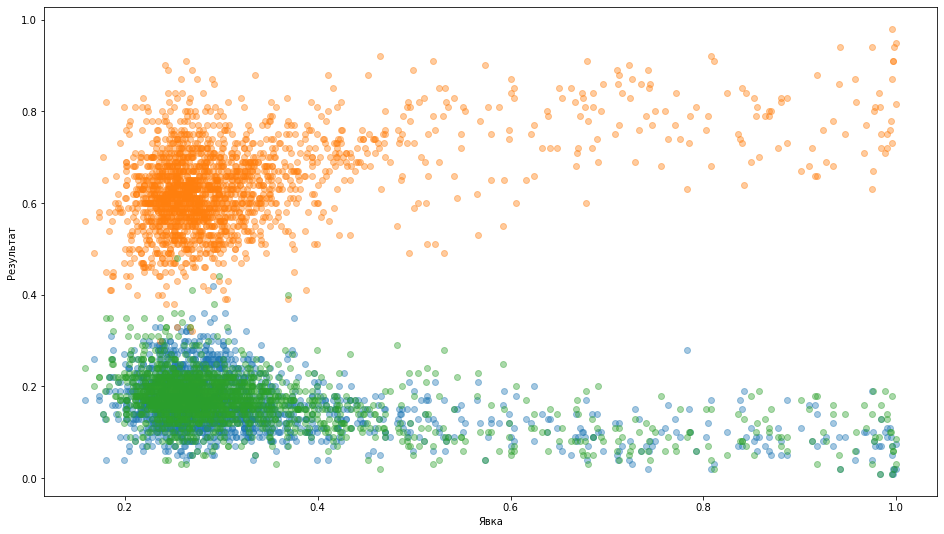

In [10]:
import matplotlib.pyplot as plt


amosov_data = df.loc[df[amosov_percent] != -1].groupby(attendance)[amosov_percent].mean()
beglov_data = df.loc[df[beglov_percent] != -1].groupby(attendance)[beglov_percent].mean()
tikhonova_data = df.loc[df[tikhonova_percent] != -1].groupby(attendance)[tikhonova_percent].mean()

x_amosov = amosov_data.index
y_amosov = amosov_data.values

x_beglov = beglov_data.index
y_beglov = beglov_data.values

x_tikhonova = tikhonova_data.index
y_tikhonova = tikhonova_data.values

plt.figure(figsize=(16, 9))
plt.scatter(x_amosov, y_amosov, alpha=0.4)
plt.scatter(x_beglov, y_beglov, alpha=0.4)
plt.scatter(x_tikhonova, y_tikhonova, alpha=0.4)
plt.xlabel("Явка")
plt.ylabel("Результат")
plt.show()